In [60]:
# problem statement 

In [61]:
# importing the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sqlite3 
%matplotlib inline

In [62]:
import sqlite3
conn = sqlite3.connect("classification.db")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('fraud_detection',), ('Heart_disease',), ('Metro_Train_Maintenance',), ('forest_cov_type',), ('fake_news_classification',), ('drug_reviews_sentiment_analysis',), ('Telecom_microservices_loan',), ('malware_detection',), ('fault_detection_manufacturing',)]


In [63]:
#connect to the SQlite database file
conn = sqlite3.connect("classification.db")


#load the table from the database
df=pd.read_sql("select* FROM fraud_detection",conn)

# close the connection
conn.close()




In [64]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [65]:
df.shape

(6362620, 11)

In [66]:
df.isnull().sum()

step                   0
type              203603
amount                 0
nameOrig          203603
oldbalanceOrg          0
newbalanceOrig    267230
nameDest               0
oldbalanceDest    203603
newbalanceDest         0
isFraud                0
isFlaggedFraud         0
dtype: int64

In [67]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [69]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.095390e+06,6.159017e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.550005e+05,1.101147e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.923541e+06,3.408166e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327682e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442704e+05,9.431247e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


checking the unique values present in the column ignore numeric column 


In [70]:
#checking the unique value in the type colummns 
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', None, 'CASH_IN'],
      dtype=object)

**intepreatation** no all are the unique values 

In [71]:
#checking the duplicates in the dataset 
df.duplicated().sum()

np.int64(0)

**Interpretation** :-there is no duplicate values present in the DF

#### checking the missing value 

In [72]:
total_row= len(df)
for col in df.columns:
    missing_percentage=(df[col].isnull().sum() / total_row)*100
    print(f'{col}:{missing_percentage:.2f}%')


step:0.00%
type:3.20%
amount:0.00%
nameOrig:3.20%
oldbalanceOrg:0.00%
newbalanceOrig:4.20%
nameDest:0.00%
oldbalanceDest:3.20%
newbalanceDest:0.00%
isFraud:0.00%
isFlaggedFraud:0.00%


**Interpretation:-** missing value percentage is less than 5% so we can delete the row for the better results 

In [73]:
#deleting the missing value 
df_cleaned=df.dropna()

In [74]:
#checking the shape of the data-frame 
df_cleaned.shape

(5900334, 11)

In [75]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5900334 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 540.2+ MB


In [76]:
df_cleaned['isFraud'].value_counts()
df_cleaned['isFraud'].value_counts(normalize=True) * 100


isFraud
0    99.871346
1     0.128654
Name: proportion, dtype: float64

In [77]:
(df_cleaned['oldbalanceOrg'] - df_cleaned['amount'] - df_cleaned['newbalanceOrig']).describe()


count    5.900334e+06
mean    -2.011511e+05
std      6.066752e+05
min     -9.244552e+07
25%     -2.496689e+05
50%     -6.869954e+04
75%     -2.955278e+03
max      1.000000e-02
dtype: float64

In [78]:
(df_cleaned['oldbalanceDest'] + df_cleaned['amount'] - df_cleaned['newbalanceDest']).describe()


count    5.900334e+06
mean     5.558953e+04
std      4.413054e+05
min     -7.588573e+07
25%      0.000000e+00
50%      3.500140e+03
75%      2.936704e+04
max      1.319123e+07
dtype: float64

In [79]:
df['isFraud'].value_counts(normalize=True) * 100


isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

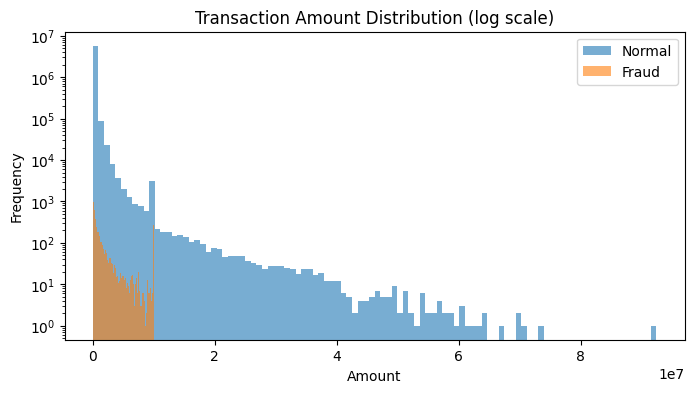

In [80]:
plt.figure(figsize=(8, 4))

plt.hist(
    df_cleaned[df_cleaned['isFraud'] == 0]['amount'],
    bins=100,
    alpha=0.6,
    label='Normal',
    log=True
)

plt.hist(
    df_cleaned[df_cleaned['isFraud'] == 1]['amount'],
    bins=100,
    alpha=0.6,
    label='Fraud',
    log=True
)

plt.legend()
plt.title('Transaction Amount Distribution (log scale)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_11064\3855224191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['log_amount'] = np.log1p(df_cleaned['amount'])


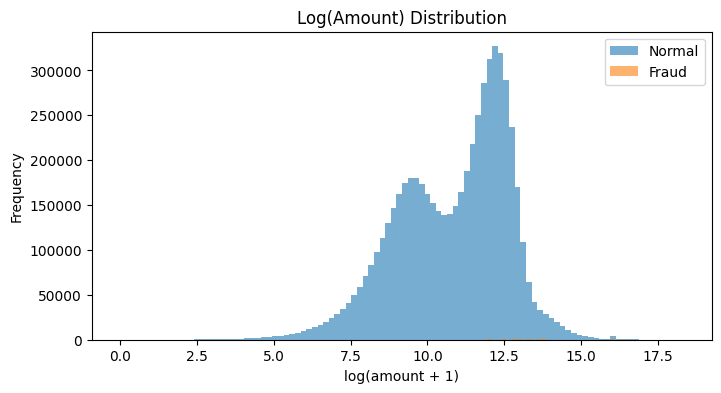

In [81]:
df_cleaned['log_amount'] = np.log1p(df_cleaned['amount'])

plt.figure(figsize=(8, 4))

plt.hist(
    df_cleaned[df_cleaned['isFraud'] == 0]['log_amount'],
    bins=100,
    alpha=0.6,
    label='Normal'
)

plt.hist(
    df_cleaned[df_cleaned['isFraud'] == 1]['log_amount'],
    bins=100,
    alpha=0.6,
    label='Fraud'
)

plt.legend()
plt.title('Log(Amount) Distribution')
plt.xlabel('log(amount + 1)')
plt.ylabel('Frequency')
plt.show()


In [82]:
df_cleaned['amount'].skew()


np.float64(31.007790775970268)

In [83]:
df_cleaned.groupby('isFraud')['amount'].skew()



isFraud
0    31.906654
1     2.385257
Name: amount, dtype: float64

In [84]:
df_cleaned.groupby('isFraud')['oldbalanceOrg'].skew()



isFraud
0    5.245830
1    6.090127
Name: oldbalanceOrg, dtype: float64

In [85]:
df['log_amount'] = np.log1p(df['amount'])
df = df.drop(columns=['amount'])


In [86]:
features_num = [
    'step',
    'log_amount',
    'oldbalanceOrg',
    'oldbalanceDest'
]

features_cat = ['type']

X = df_cleaned[features_num + features_cat]
y = df_cleaned['isFraud']


In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [89]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_cat)
    ]
)


In [90]:
from sklearn.linear_model import LogisticRegression


In [91]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',   # NON-NEGOTIABLE
    solver='lbfgs',
    n_jobs=-1
)


In [92]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('model', log_reg)
])


In [93]:
pipeline.fit(X_train, y_train)


c:\Users\Hp\Desktop\New folder\capstone projects\Working\VS code\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains s

In [94]:
#evaluation baseline metrics 

In [95]:
y_train_prob = pipeline.predict_proba(X_train)[:, 1]
y_test_prob  = pipeline.predict_proba(X_test)[:, 1]


In [96]:
#overfitting and underfitting checks
from sklearn.metrics import average_precision_score

train_pr_auc = average_precision_score(y_train, y_train_prob)
test_pr_auc  = average_precision_score(y_test, y_test_prob)

train_pr_auc, test_pr_auc
 

(0.2643976474928913, 0.26077114628930065)

In [97]:
#study the learning curves 
from sklearn.model_selection import learning_curve
import numpy as np


In [98]:
train_sizes, train_scores, val_scores = learning_curve(
    pipeline,
    X_train,
    y_train,
    scoring='average_precision',
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,
    n_jobs=-1
)


In [99]:
train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)

list(zip(train_sizes, train_mean, val_mean))


[(np.int64(314684),
  np.float64(0.24212742168028775),
  np.float64(0.24528666564695653)),
 (np.int64(1022724),
  np.float64(0.2573806459047715),
  np.float64(0.2601334841558514)),
 (np.int64(1730764),
  np.float64(0.2565026786262463),
  np.float64(0.26256168556269505)),
 (np.int64(2438804),
  np.float64(0.2670470171847708),
  np.float64(0.2668462030108125)),
 (np.int64(3146844),
  np.float64(0.26967055854525673),
  np.float64(0.2696973009550793))]

In [109]:
#updated threshold 
from sklearn.metrics import classification_report

y_test_pred_default = (y_test_prob >= 0.736).astype(int)
print(classification_report(y_test, y_test_pred_default))



              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1178549
           1       0.03      0.80      0.06      1518

    accuracy                           0.97   1180067
   macro avg       0.51      0.88      0.52   1180067
weighted avg       1.00      0.97      0.98   1180067



In [101]:
#custom threshold 
from sklearn.metrics import precision_recall_curve



In [102]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)


In [103]:
import numpy as np

idx = np.where(recall >= 0.8)[0][0]
chosen_threshold = thresholds[idx]
chosen_threshold



np.float64(3.0131039367068927e-151)

In [104]:
y_test_pred_custom = (y_test_prob >= chosen_threshold).astype(int)
print(classification_report(y_test, y_test_pred_custom))


c:\Users\Hp\Desktop\New folder\capstone projects\Working\VS code\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

           0       0.00      0.00      0.00   1178549
           1       0.00      1.00      0.00      1518

    accuracy                           0.00   1180067
   macro avg       0.00      0.50      0.00   1180067
weighted avg       0.00      0.00      0.00   1180067



c:\Users\Hp\Desktop\New folder\capstone projects\Working\VS code\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Hp\Desktop\New folder\capstone projects\Working\VS code\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [105]:
valid_idx = np.where(
    (recall >= 0.8) & (precision >= 0.01)
)[0]

threshold = thresholds[valid_idx[-1]]
threshold



np.float64(0.7357379568998907)

In [106]:
y_test_pred_final = (y_test_prob >= threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_final))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1178549
           1       0.03      0.80      0.06      1518

    accuracy                           0.97   1180067
   macro avg       0.51      0.88      0.52   1180067
weighted avg       1.00      0.97      0.98   1180067

